# 2. Comparative Study

## a. Investigate the Performance of ML Procedures on Given Dataset. 

### Import required packages

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

RAND_STATE = 42

In [2]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import TimeSeriesSplit

In [3]:
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import f1_score as fss
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import plot_confusion_matrix


## Load Dataset

In [4]:
# Read in training data

data = pd.read_csv("analysis_dataset2.csv")
data2 = data.copy()

# make a list of the column names for later use
col_names = data2.columns 

## Exploratory Data Analysis.

### View Dataset

### Data Summary

In [5]:
# Check number of observations and features

data2.shape

(11249, 27)

There are 11249 observations and 58 variables, including the target, in the data set. 

In [6]:
# Check data type for all variables

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11249 entries, 0 to 11248
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hrv_mean          11249 non-null  float64
 1   hrv_min           11249 non-null  float64
 2   hrv_max           11249 non-null  float64
 3   hrv_skewness      11249 non-null  float64
 4   hrv_kurtosis      11249 non-null  float64
 5   hrv_peaks         11249 non-null  int64  
 6   hrv_iqr           11249 non-null  float64
 7   hrv_entropy       11249 non-null  float64
 8   hrv_perm_entropy  11249 non-null  float64
 9   hrv_svd_entropy   11249 non-null  float64
 10  hrv_total_power   11249 non-null  float64
 11  acc_x_min         11249 non-null  int64  
 12  acc_x_sum         11249 non-null  int64  
 13  acc_x_peaks       11249 non-null  int64  
 14  acc_y_std         11249 non-null  float64
 15  acc_y_min         11249 non-null  int64  
 16  acc_y_sum         11249 non-null  int64 

All the variables are float, and none is missing any observation.

In [7]:
# Overview of data

data2.head()

,hrv_mean,hrv_min,hrv_max,hrv_skewness,hrv_kurtosis,hrv_peaks,hrv_iqr,hrv_entropy,hrv_perm_entropy,hrv_svd_entropy,...,acc_y_peaks,acc_y_iqr,acc_z_peaks,l2_min,l2_sum,l2_skewness,l2_kurtosis,l2_peaks,l2_entropy,Stress
0,658.290289,343.75,1359.375,0.892949,3.551674,163,109.375,6.393289,0.996143,0.353303,...,367,79.0,380,23.108440,2.748692e+09,43.783565,1915.000521,376,0.000838,1
1,658.563852,343.75,1359.375,0.885552,3.604227,160,109.375,6.386720,0.996091,0.353841,...,361,78.0,373,23.108440,2.748692e+09,43.783565,1915.000521,373,0.000837,1
2,658.441152,343.75,1359.375,0.888252,3.659781,159,109.375,6.383424,0.996415,0.352923,...,358,78.0,367,23.108440,2.748692e+09,43.783565,1915.000521,369,0.000837,1
3,658.115672,343.75,1359.375,0.891856,3.750922,160,109.375,6.390196,0.997105,0.352534,...,353,77.0,365,23.108440,2.748692e+09,43.783565,1915.000521,364,0.000836,1
4,658.057851,343.75,1359.375,0.893507,3.819550,161,109.375,6.393591,0.997124,0.353910,...,352,77.0,361,24.515301,2.748692e+09,43.783565,1915.000521,364,0.000837,1


In [8]:
# Check for missing values/data, if at all

data2.isnull().sum()

hrv_mean            0
hrv_min             0
hrv_max             0
hrv_skewness        0
hrv_kurtosis        0
hrv_peaks           0
hrv_iqr             0
hrv_entropy         0
hrv_perm_entropy    0
hrv_svd_entropy     0
hrv_total_power     0
acc_x_min           0
acc_x_sum           0
acc_x_peaks         0
acc_y_std           0
acc_y_min           0
acc_y_sum           0
acc_y_peaks         0
acc_y_iqr           0
acc_z_peaks         0
l2_min              0
l2_sum              0
l2_skewness         0
l2_kurtosis         0
l2_peaks            0
l2_entropy          0
Stress              0
dtype: int64

In [9]:
data2 = data2.dropna()
data2 = data2.reset_index(drop=True)
data2.shape

(11249, 27)

All the columns have complete values in them. 

In [10]:
# Check distribution of label/target variable to see 
# no. of observations belonging to each class.

data2['Stress'].value_counts()

0    5674
1    5575
Name: Stress, dtype: int64

In [11]:
# Check distribution of target variable in percentage terms

data2['Stress'].value_counts()/float(len(data2)) 

0    0.5044
1    0.4956
Name: Stress, dtype: float64

In percentage terms, about 43.5% of the observations show now stress, i.e. 43% did not suffer from stress, about 38.4% had mild stress, and some 18.1% did suffer from acute stress. The distribution of the target variable shows the data is not balanced. This is important to bear in mind for this assignment as Accuracy of the prediction is the goal.

This can be seen from the bar graph below of both classes of the target variable. Following this method, around half of the data is labelled as stressed. 

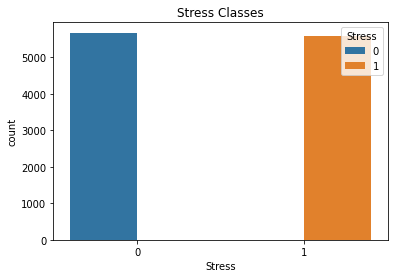

In [12]:
# Plot counts of target variables

ax = sns.countplot(x='Stress', hue='Stress', data=data2)
plt.title('Stress Classes')
plt.show()

#### Descriptive Statistics

In [13]:
# Get a summary description for the numeric variables in the dataset; 
# central tendency, dispersion and shape of a datasetâ€™s distribution,

round(data2.describe(),3) 

,hrv_mean,hrv_min,hrv_max,hrv_skewness,hrv_kurtosis,hrv_peaks,hrv_iqr,hrv_entropy,hrv_perm_entropy,hrv_svd_entropy,...,acc_y_peaks,acc_y_iqr,acc_z_peaks,l2_min,l2_sum,l2_skewness,l2_kurtosis,l2_peaks,l2_entropy,Stress
count,11249.000,11249.000,11249.000,11249.000,11249.000,11249.000,11249.000,11249.000,11249.000,11249.000,...,11249.000,11249.000,11249.000,11249.000,1.124900e+04,11249.000,11249.000,11249.000,11249.000,11249.000
mean,656.892,398.256,1038.887,0.645,2.056,150.058,107.273,6.371,0.990,0.291,...,241.786,15.104,21.330,126.151,1.173994e+07,0.538,15.475,93.489,7.528,0.496
std,23.581,50.876,135.209,0.450,2.654,38.856,32.686,0.289,0.006,0.034,...,72.347,21.168,86.856,24.907,1.772914e+08,3.345,124.761,110.505,0.488,0.500
min,593.352,312.500,812.500,-0.467,-1.042,54.000,46.875,5.439,0.962,0.228,...,15.000,0.000,0.000,19.672,1.234160e+05,-8.019,-1.996,0.000,0.001,0.000
25%,640.849,359.375,953.125,0.311,0.337,125.000,85.938,6.219,0.987,0.267,...,199.000,1.000,0.000,127.161,2.560213e+05,-0.588,0.003,4.000,7.560,0.000
50%,657.004,390.625,1015.625,0.656,1.177,149.000,93.750,6.395,0.991,0.288,...,252.000,2.000,0.000,128.604,2.665536e+05,0.199,1.975,40.000,7.560,0.000
75%,674.660,437.500,1078.125,0.927,3.026,172.000,125.000,6.548,0.995,0.307,...,288.000,25.000,0.000,137.873,2.703332e+05,1.021,7.328,167.000,7.560,1.000
max,710.018,531.250,1640.625,2.094,15.752,272.000,218.750,6.983,1.000,0.437,...,473.000,120.000,463.000,141.771,2.748693e+09,43.784,1915.001,464.000,7.560,1.000


A perculiar observation from the data is that the first 30 columns appear to be a repition, because the summary values (mean, median, standard deviation, first and third quartile) are all the same. This is very unlikely to be a random occurence. For the other 18 variables, some are skewed to the right (mean>median), with the greater majority skewed to the left (mean<median), and largely dispersed from their mean, given their large inter-quantile range. Next, we view the histogram of each variable to get an idea of their distribution.

#### Check distribution of each variable

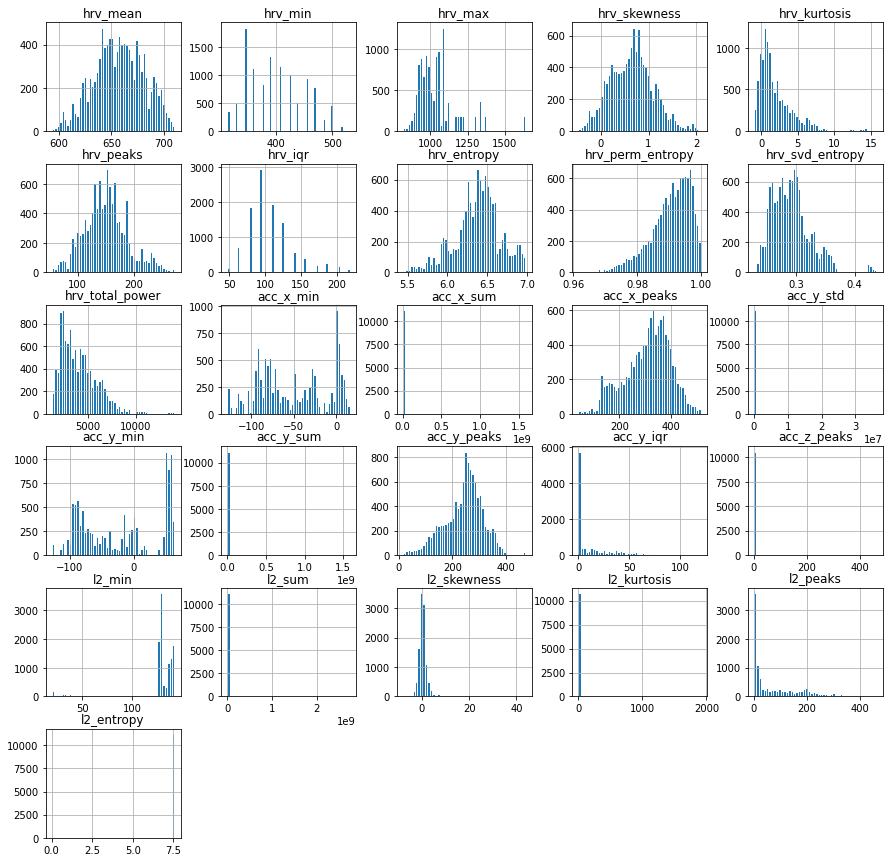

In [14]:
# visualize distribution of features 

features = data2.iloc[:, :-1].copy()
features.hist(bins=50, figsize=(15,15), ec='w')
plt.show()

From the plot of the variables, it would appear that only the variable EDAR-Skew is normally distributed. HRR_Mean, HRR_Mi, HRR_Max, TEMPR_Mean, TEMPR_Max, TEMPR_Min. are bimodal. The rest are either skewed left or right.

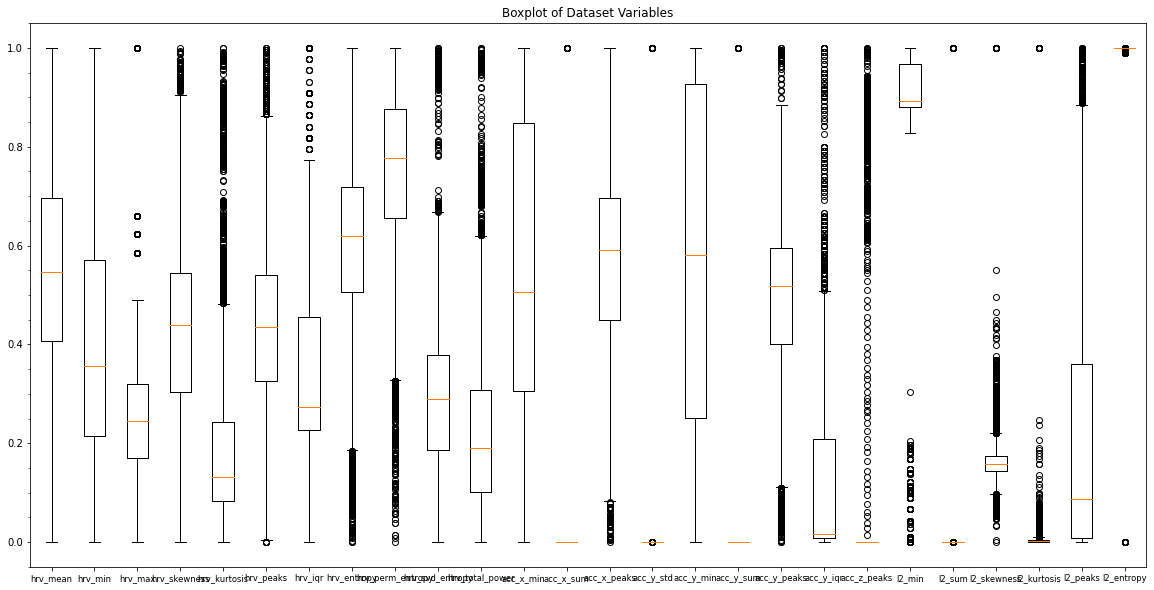

In [15]:
# Boxplot of variables.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #  Applying MinMax scaler to enable better visualization of the boxplot
# scaler = StandardScaler()

XL = scaler.fit_transform(features)
plt.figure(figsize=(20,10))
bp = plt.boxplot(np.array(XL), labels=list(features))

# Axis details
plt.title('Boxplot of Dataset Variables')
plt.minorticks_on()
plt.tick_params(axis='x', which='minor', bottom=False)
plt.tick_params(axis='x', which='major', labelsize='small')

plt.show()

All the variables have been scaled using the Min-Max scaler that compresses all the values between 0 and 1 as this enables an enlarged visualization of the boxplots than using an other scaling format. The plots confirms our suspicion that F1 is a categorical variable, along with F9 and F12. Of course, the dependent variable, Class is categorical and the boxplot shows that. Contrary to the earlier inference from the histograms that variables F3, F10 and F21 are about the only ones that appear normally distributed, the boxplots show that none of the variables likely have a normal distribution. The all have outliers, given that observations clearly lie outside the whiskers of their boxplots. We will next attempt to compute the values of the outliers before reaching a conclusion.

### Use pairwise correlation to examine relationship between variables

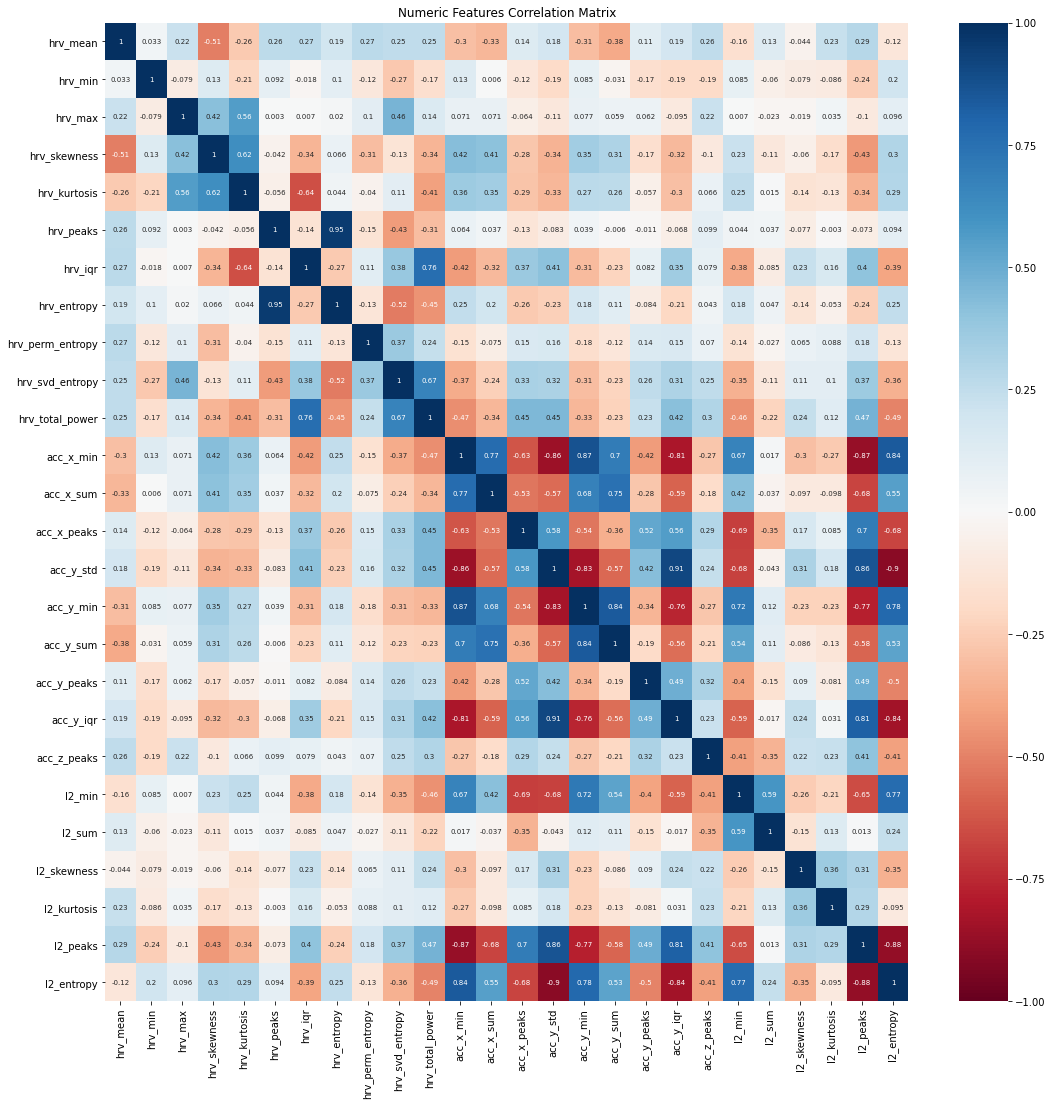

In [16]:
# Get pairwise correlation coefficients

columns = features.select_dtypes(include=['int64', 'float64']).columns
subset = features[columns]
corr = subset.corr(method='spearman') # Spearman rank correlation is more robust to outliers 

fig, ax = plt.subplots(figsize=(18,18)) # figsize in inches

sns.heatmap(round(corr,3), cmap='RdBu', annot=True, 
            annot_kws={'size': 7}, vmin=-1, vmax=1)

plt.title('Numeric Features Correlation Matrix')
plt.show()

The correlation plot was used to identify all highly correlated variables, which were then dropped, resulting in a much smaller number of features (30), rather than the 58 we started out with. Unsurprisingly, derived variables were found to be either perfectly or near perfectly correlated. By dropping the highly correlated variables we ensured that modeling was stripped of as much noise as possible.

### Separate Dataset into features and target 

Classification algorithms classify the target (dependent variable) using the features (independent variables) as predictors. Here, the column that we want to make a prediction on is the "Stress" column, the dependent or y variable.

In [17]:
# Separate features from target, by extract the features (all the columns) to X 
# and extract the target, Stress, to y. 

X = data2.iloc[:, :-1].copy()
y = data2.iloc[:, -1].copy()

### Split Dataset into training and test sets

In [18]:
# Split the data into training and test sets. The training set will provide the validation set in the
# timeseriessplit function of SKLearn library.

X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

# Scale the features 
X_train = StandardScaler().fit_transform(X_train) 

X_test = StandardScaler().fit_transform(X_test) 

# Convert the labels to categorical values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

- We proceed to fit the models using the training set, and compare the result to the results obtained from the models' predictions in the test set. In the first phase of this assignment, four classification models, Logistic Regression, SVC, Random Forest and Decision Tree, were evaluated, and Random Forest was found to be the one that fitted the data best. 

- In this second phase, the best performing model in the first phase, the Random Forest model, will be fitted using the best parameters recommended from the cross validation output. 

In [19]:
# First we fit the Dummy Classifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X, y)
print("Dummy F1 Score: %.2f" % fss(y, dummy_clf.predict(X),average='micro'))

Dummy F1 Score: 0.50


The baseline performance of our model is 50%

### RandomForest Classifier

The main parameter to select in random forest is the n_estimators parameter. In general, the more trees in the forest, the better the generalization performance will be. However, it will slow down the fitting and prediction time. The goal is to balance computing time and generalization performance when setting the number of estimators. Here, we fix n_estimators=100, which is already the default value. Tuning the n_estimators for random forests generally result in a waste of computer power. We just need to ensure that it is large enough so that doubling its value does not lead to a significant improvement of the validation error.

In [20]:
# predefine the variables
n_splits = 5  # Number of splits

model = RandomForestClassifier()  # I used random forest as my model

# Add the parameter to grid serach 
grid_params = {'n_estimators': [5, 50, 100, 200, 250, 500],
               'min_samples_leaf': [3, 4, 5, 6, 7],
              'max_depth': [10, 12, 15, 18, 20],
              'max_features': ['auto', 'sqrt', 'log2'],
              'random_state': [RAND_STATE]
              }

refit = True  # Refit an estimator using the best found parameters on the whole dataset

scoring = 'accuracy'  # Strategy to evaluate the performance of the cross-validated model on the test set

n_jobs = -1  # Number of jobs to run in parallel

tscv = TimeSeriesSplit(n_splits=10)

grid_search = GridSearchCV(estimator=model, param_grid=grid_params, refit=refit,
                           scoring=scoring, cv=tscv, n_jobs=n_jobs).fit(X, y)

print(f'Model: {model} best params are: {grid_search.best_params_}')


Model: RandomForestClassifier() best params are: {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 500, 'random_state': 42}


In [20]:
# Fit a RandomForest classifier model with the best parameters derived from the Cross Validation
# Leave the ones that coincide with the default states
# Best params: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'n_estimators': 500, 'random_state': 42}

rf_optimal_model = RandomForestClassifier(n_estimators=500, 
                                  min_samples_leaf=3, 
                                  max_depth=12,
                                  max_features = 'auto',   
                                  random_state=RAND_STATE)

 
    
# Train the model using the complete training dataset
rf_optimal_model.fit(X_train, y_train)

#Predict the response for test dataset
y_optimal_pred = rf_optimal_model.predict(X_test)

# Evaluating the Model
# Let's estimate how accurately the classifier or model can predict the breast cancer of patients.
# Accuracy can be computed by comparing actual test set values and predicted values.
# Model Accuracy: how often is the classifier correct?
#print("The optimal model's accuracy is:", metrics.accuracy_score(y_test, y_optimal_pred))

print(metrics.classification_report(y_test, y_optimal_pred))

#print(f"The optimal model's accuracy is:{round(accuracy_score(y_test,y_optimal_pred)*100,4)}%")

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1436
           1       1.00      0.78      0.88      1939

   micro avg       0.88      0.88      0.88      3375
   macro avg       0.89      0.89      0.88      3375
weighted avg       0.90      0.88      0.88      3375
 samples avg       0.88      0.88      0.88      3375



In [21]:
f1score   = f1_score(y_test, y_optimal_pred, average = 'macro')
recall    = recall_score(y_test, y_optimal_pred, average = 'macro')
precision = precision_score(y_test, y_optimal_pred, average = 'macro')
accuracy  = accuracy_score(y_test, y_optimal_pred)

print('Test Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall) 
print('f1 =', f1score)

Test Accuracy = 0.8752592592592593
Precision = 0.886645126548196
Recall = 0.8914388860237236
f1 = 0.8751855800573107


From the classification report, it can be observed that recall for class 0, the no stress category, is 0.78, but the F1 score, the harmonic mean of recall and precision, is 0.88. For class 1, the stressed category, both precision and recall are high for class 2, 0.74, 0.72 - and for class 1, recall is 1.0, or perfect. This suggests the model is able to easily identif stressed cases. However, the F1 score is 0.87. 

The Random Forest model performed 37.5% better in predicting stress compared to the Dummy Classifier, or random guessing.

Text(0.5, 33.0, 'Predicted label')

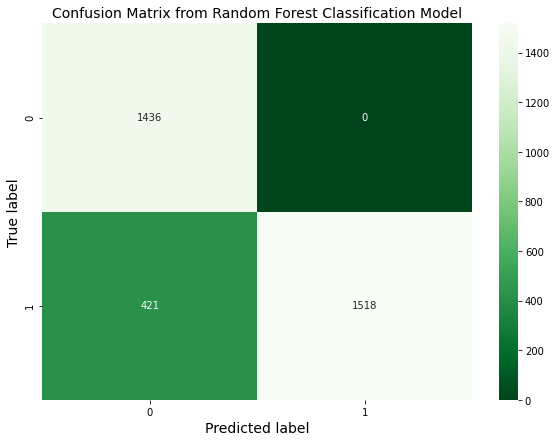

In [22]:
plt.figure(figsize = (8, 6))
cm = confusion_matrix(y_test.argmax(axis=1), y_optimal_pred.argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens_r").set_title('Confusion Matrix from Random Forest Classification Model', size = 14)
plt.tight_layout()
plt.ylabel('True label', size = 14)
plt.xlabel('Predicted label', size = 14)

### Result from Modelling with Incomplete Datasets using the Robust Scaler

##### We see in all cases that the training performance was better than the test performance, which means the model did not overfit.

In [23]:
# Ensure that input to confusion_matrix is a list of predictions and not OHEs by
# calling argmax on both y_test and predicted values

confusion_matrix(y_test.argmax(axis=1), y_optimal_pred.argmax(axis=1))

array([[1436,    0],
       [ 421, 1518]], dtype=int64)

In [24]:
print(f" There are {len(rf_optimal_model.feature_importances_)} features in total")

print(rf_optimal_model.feature_importances_)

 There are 26 features in total
[0.02258212 0.01112302 0.00778667 0.00854126 0.0065902  0.49096395
 0.00179167 0.29348309 0.01545727 0.04681684 0.0190952  0.00453435
 0.00913748 0.00667342 0.00173495 0.00391869 0.00667938 0.00409343
 0.00163186 0.00262477 0.0051369  0.01155684 0.00173916 0.003127
 0.00903953 0.00414096]


Text(0.5, 0, 'Random Forest Feature Importance')

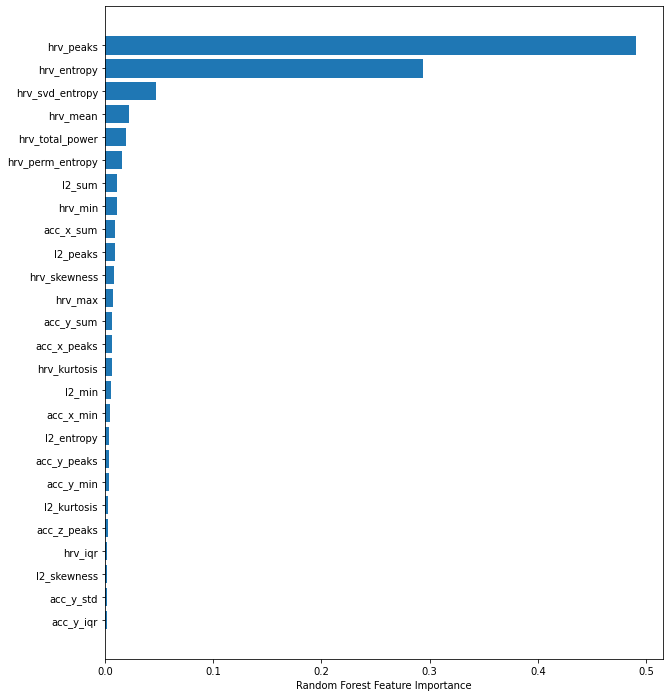

In [25]:
# Plot the important featuresin decreasing order of importance:

plt.figure(figsize = (10, 12))
sorted_idx = rf_optimal_model.feature_importances_.argsort()
plt.barh(col_names[sorted_idx], rf_optimal_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [26]:
# lstm model
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Sequential
from tensorflow.keras import layers
from keras_tuner import RandomSearch
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import classification_report, confusion_matrix

tf.keras.utils.set_random_seed(349)

In [27]:
data = pd.read_csv('analysis_dataset2.csv')

# To ensure it is not fitting noise, we use a reduced dataset, without 
# the irrelevant features of the Random Forest model

#data = pd.read_csv('analysis_dataset2.csv')

In [28]:
# Separate features from target 

X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy() # Remember to convert this to a categorical variable

In [29]:
# SPLIT THE DATA

X_train = X[:int(X.shape[0]*0.8)]
X_test = X[int(X.shape[0]*0.8):]
y_train = y[:int(X.shape[0]*0.8)]
y_test = y[int(X.shape[0]*0.8):]

# Encode the labels

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [30]:
X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [31]:
# Scale the features 

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test) 

In [32]:
# Reshape features into 3 dimension

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [33]:
import tensorflow as tf

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
tf.keras.utils.set_random_seed(349)

# Building an CNN model
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(X_train.shape[1],X_train.shape[2])))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [34]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics =['binary_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 128)           768       
                                                                 
 dropout (Dropout)           (None, 26, 128)           0         
                                                                 
 flatten (Flatten)           (None, 3328)              0         
                                                                 
 dense (Dense)               (None, 32)                106528    
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 107,362
Trainable params: 107,362
Non-trainable params: 0
_________________________________________________________________


In [35]:
#from tensorflow import keras

tf.keras.utils.set_random_seed(349)

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,  
              loss=keras.losses.BinaryCrossentropy(), 
              metrics=['binary_accuracy'])

history = model.fit(X_train, y_train,
                batch_size=16,
                epochs=5,
                # validation_data =(X_val, y_val),
                validation_split=0.20,
                    shuffle=False)

Epoch 1/5
450/450 [==============================] - 2s 3ms/step - loss: 0.4270 - binary_accuracy: 0.8450 - val_loss: 1.0937 - val_binary_accuracy: 0.7272
Epoch 2/5
450/450 [==============================] - 1s 2ms/step - loss: 0.2287 - binary_accuracy: 0.8973 - val_loss: 1.6811 - val_binary_accuracy: 0.6883
Epoch 3/5
450/450 [==============================] - 1s 3ms/step - loss: 0.1715 - binary_accuracy: 0.9362 - val_loss: 0.5640 - val_binary_accuracy: 0.8244
Epoch 4/5
450/450 [==============================] - 1s 2ms/step - loss: 0.1300 - binary_accuracy: 0.9475 - val_loss: 0.6442 - val_binary_accuracy: 0.8250
Epoch 5/5
450/450 [==============================] - 1s 3ms/step - loss: 0.0896 - binary_accuracy: 0.9654 - val_loss: 0.9104 - val_binary_accuracy: 0.8244


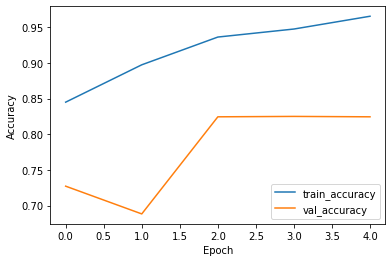

In [36]:
# Plot the training and validation accuracies

plt.plot(history.history['binary_accuracy'], label='train_accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [37]:
# find out accuracy on  the test dataset

acc = model.evaluate(X_test, y_test)
print("Loss:", acc[0], " test_accuracy:", acc[1])


71/71 [==============================] - 0s 1ms/step - loss: 0.7594 - binary_accuracy: 0.8342
Loss: 0.7593960762023926  test_accuracy: 0.8342221975326538


In [38]:
# Predict on the test data

pred = model.predict(X_test)
pred_y = pred.argmax(axis=-1)

71/71 [==============================] - 0s 1ms/step


In [39]:
# First I need to convert the labels from one-hot encoded vectors to single-digit values, as follows.

y_labels=np.argmax(y_test, axis=1)
y_labels[1]

# then I can use the values to get the confusion matrix
cm = confusion_matrix(y_labels, pred_y)
print(cm)

[[988   2]
 [371 889]]


### Use KERAS Tuner to tune model parameters

In [40]:
def build_model(hp): 
    model = keras.Sequential([
        keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(X_train.shape[1],X_train.shape[2])
    ),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(2, activation='softmax')
  ])
  
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
    return model

In [44]:
#from keras_tuner import RandomSearch

tf.keras.utils.set_random_seed(349)

tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,
                          directory='output',
                          project_name="Data Science")

In [45]:
tf.keras.utils.set_random_seed(349)

tuner_search.search(X_train,y_train,epochs=3,validation_split=0.25)

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.9413333535194397

Best val_accuracy So Far: 0.9515555500984192
Total elapsed time: 00h 00m 14s
INFO:tensorflow:Oracle triggered exit


In [46]:
model2=tuner_search.get_best_models(num_models=1)[0]

In [47]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            256       
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 32)                49184     
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 49,506
Trainable params: 49,506
Non-trainable params: 0
_________________________________________________________________


In [48]:
tf.keras.utils.set_random_seed(349)

history1=model2.fit(X_train,y_train, epochs=10, validation_split=0.25, initial_epoch=3)

Epoch 4/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0308 - accuracy: 0.9889 - val_loss: 0.4499 - val_accuracy: 0.9049
Epoch 5/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0421 - accuracy: 0.9834 - val_loss: 0.2077 - val_accuracy: 0.9422
Epoch 6/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9852 - val_loss: 0.2405 - val_accuracy: 0.9333
Epoch 7/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0330 - accuracy: 0.9871 - val_loss: 0.1840 - val_accuracy: 0.9422
Epoch 8/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0301 - accuracy: 0.9880 - val_loss: 0.4924 - val_accuracy: 0.9049
Epoch 9/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9865 - val_loss: 0.2008 - val_accuracy: 0.9484
Epoch 10/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0287 - accuracy: 0.9890 - val_loss: 0.1442 - val_accuracy: 0.9680


The validation accuracy from the hyperparameter tuning is 0.968 compared to the 0.824 for the manually fitted model above.

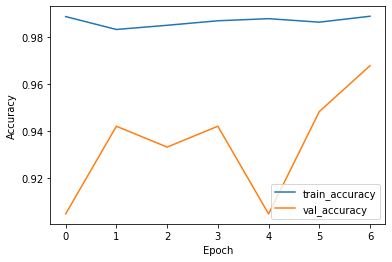

In [49]:
plt.plot(history1.history['accuracy'], label='train_accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [50]:
# Check the test accuracy for the hypertuned model.

acc = model2.evaluate(X_test, y_test)
print("Loss:", acc[0], " test_accuracy:", acc[1])


71/71 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.8924
Loss: 0.5936374664306641  test_accuracy: 0.8924444317817688


The test accuracy for the hyperturne model is 0.892, or 89.2%, compared to 0.83 for the manually fitted model above.

In [51]:
pred = model2.predict(X_test)
pred_y = pred.argmax(axis=-1)


71/71 [==============================] - 0s 1ms/step


In [52]:
# First I need to convert the labels from one-hot encoded vectors to single-digit values, as follows.

y_labels=np.argmax(y_test, axis=1)
y_labels[1]

# then I can use the values to get the confusion matrix
cm = confusion_matrix(y_labels, pred_y)
print(cm)

[[ 990    0]
 [ 242 1018]]


In [53]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

y_pred1 = model2.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

# Print f1, precision, and recall scores
print(precision_score(np.argmax(y_test, axis=1), pred_y , average="macro"))
print(recall_score(np.argmax(y_test, axis=1), pred_y , average="macro"))
print(f1_score(np.argmax(y_test, axis=1), pred_y , average="macro"))

71/71 [==============================] - 0s 1ms/step
0.9017857142857143
0.903968253968254
0.8924277853597475


In [54]:
from sklearn.metrics import classification_report

y_pred = model2.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_bool))

36/36 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       990
           1       1.00      0.81      0.89      1260

    accuracy                           0.89      2250
   macro avg       0.90      0.90      0.89      2250
weighted avg       0.91      0.89      0.89      2250

